In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [2]:
df_clients = pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','2_detail_table_customers.xls'))
df_depot = pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','4_detail_table_depots.xls'))

In [3]:
# Extraction des informations pertinentes pour les clients
columns_clients = ["CUSTOMER_NUMBER", "CUSTOMER_LATITUDE", "CUSTOMER_LONGITUDE"]
data_clients = df_clients[columns_clients].rename(columns={"CUSTOMER_NUMBER": "number", "CUSTOMER_LATITUDE": "x", "CUSTOMER_LONGITUDE": "y"})
data_clients = data_clients.head(30)
NUM_CLIENTS=len(data_clients)

In [4]:
# Extraction des informations pertinentes pour le dépôt
depot_info = df_depot[['DEPOT_CODE', 'DEPOT_LATITUDE', 'DEPOT_LONGITUDE']].drop_duplicates()
depot_info = depot_info.rename(columns={"DEPOT_CODE": "number", "DEPOT_LATITUDE": "x", "DEPOT_LONGITUDE": "y"})

# Ajout du dépôt aux données clients
"""data_clients.loc[len(data_clients)] = depot_info.iloc[0]
data_clients[['x', 'y']] = data_clients[['x', 'y']]
# Constantes pour les positions des clients et du dépôt

DEPOT = (data_clients.iloc[-1]['x'], data_clients.iloc[-1]['y'])"""
client_positions = list(zip(data_clients['x'], data_clients['y']))

In [5]:
print(len(client_positions))
print(NUM_CLIENTS)
print(client_positions)

30
30
[(43.41305, 17.87588), (43.135963, 17.776839), (43.46907801, 17.33702249), (43.70716, 17.2229), (43.08222786, 17.96003741), (43.46470189, 17.31043644), (43.35266, 17.80444), (43.48189308, 17.30045863), (43.35459, 17.79902), (43.396088, 17.871369), (43.71657, 17.23185), (43.11036, 17.70165), (43.71619, 17.2317), (43.54998018, 17.42732548), (43.475001, 17.325417), (43.33841, 17.79242), (43.111171, 17.69928539), (43.34568, 17.80545), (43.36378, 17.82157), (43.32605, 17.82229), (43.224819, 17.695885), (43.71695937, 17.23264032), (43.46991226, 17.3333838), (43.36369616, 17.8181746), (43.34521, 17.7901), (43.71342, 17.23878), (43.429906, 17.7661), (43.11155, 17.71267), (43.586910367012, 17.298542261123), (43.71763, 17.22673)]


In [6]:
import math
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, p):
        xDis = self.x - p.x
        yDis = self.y - p.y
        distance = math.sqrt(xDis ** 2 + yDis ** 2)
        return distance
    
    def __repr__(self):
        return f"({self.x},{self.y})"

In [7]:
pointsL=[]
for element in client_positions:
    pointsL.append(Point((element[0]),(element[1])))
print(pointsL)


[(43.41305,17.87588), (43.135963,17.776839), (43.46907801,17.33702249), (43.70716,17.2229), (43.08222786,17.96003741), (43.46470189,17.31043644), (43.35266,17.80444), (43.48189308,17.30045863), (43.35459,17.79902), (43.396088,17.871369), (43.71657,17.23185), (43.11036,17.70165), (43.71619,17.2317), (43.54998018,17.42732548), (43.475001,17.325417), (43.33841,17.79242), (43.111171,17.69928539), (43.34568,17.80545), (43.36378,17.82157), (43.32605,17.82229), (43.224819,17.695885), (43.71695937,17.23264032), (43.46991226,17.3333838), (43.36369616,17.8181746), (43.34521,17.7901), (43.71342,17.23878), (43.429906,17.7661), (43.11155,17.71267), (43.586910367012,17.298542261123), (43.71763,17.22673)]


In [147]:
def split_list(input_list, n):
    sublist_size = len(input_list) // n
    remainder = len(input_list) % n
    sublists = []
    index = 0
    for i in range(n):
        sublist = input_list[index:index + sublist_size]
        if remainder > 0:
            sublist.append(input_list[index + sublist_size])
            remainder -= 1
            index += sublist_size + 1
        else:
            index += sublist_size
        sublists.append(sublist)
    return sublists
n=2

In [9]:
def createIt(pointsList):
    return random.sample(pointsList, len(pointsList))

i1=split_list(createIt(pointsL),n)
i2=split_list(createIt(pointsL),n)
print(i1)
print(i2)

[[(43.71619,17.2317), (43.111171,17.69928539), (43.135963,17.776839), (43.429906,17.7661), (43.34521,17.7901), (43.11155,17.71267), (43.11036,17.70165), (43.36369616,17.8181746)], [(43.54998018,17.42732548), (43.71763,17.22673), (43.224819,17.695885), (43.34568,17.80545), (43.396088,17.871369), (43.41305,17.87588), (43.70716,17.2229), (43.71342,17.23878)], [(43.35266,17.80444), (43.35459,17.79902), (43.46470189,17.31043644), (43.71657,17.23185), (43.32605,17.82229), (43.36378,17.82157), (43.33841,17.79242)], [(43.46991226,17.3333838), (43.586910367012,17.298542261123), (43.46907801,17.33702249), (43.48189308,17.30045863), (43.71695937,17.23264032), (43.08222786,17.96003741), (43.475001,17.325417)]]
[[(43.71619,17.2317), (43.08222786,17.96003741), (43.429906,17.7661), (43.36369616,17.8181746), (43.41305,17.87588), (43.475001,17.325417), (43.35266,17.80444), (43.71695937,17.23264032)], [(43.35459,17.79902), (43.46991226,17.3333838), (43.46907801,17.33702249), (43.32605,17.82229), (43.338

In [135]:
def initialPopulation(popSize, pointsL):
    population = []

    for i in range(popSize):
        population.append(split_list(createIt(pointsL),n))
    return population

#myPop1=initialPopulation(10, pointsL)
myPop2=initialPopulation(7, pointsL)
myPop2

[[[(43.46991226,17.3333838),
   (43.46470189,17.31043644),
   (43.35459,17.79902),
   (43.48189308,17.30045863),
   (43.70716,17.2229),
   (43.71695937,17.23264032),
   (43.36378,17.82157),
   (43.33841,17.79242)],
  [(43.54998018,17.42732548),
   (43.586910367012,17.298542261123),
   (43.396088,17.871369),
   (43.429906,17.7661),
   (43.224819,17.695885),
   (43.41305,17.87588),
   (43.71657,17.23185),
   (43.475001,17.325417)],
  [(43.34568,17.80545),
   (43.34521,17.7901),
   (43.11036,17.70165),
   (43.71763,17.22673),
   (43.35266,17.80444),
   (43.32605,17.82229),
   (43.11155,17.71267)],
  [(43.08222786,17.96003741),
   (43.71342,17.23878),
   (43.36369616,17.8181746),
   (43.71619,17.2317),
   (43.111171,17.69928539),
   (43.135963,17.776839),
   (43.46907801,17.33702249)]],
 [[(43.71695937,17.23264032),
   (43.32605,17.82229),
   (43.396088,17.871369),
   (43.111171,17.69928539),
   (43.48189308,17.30045863),
   (43.71619,17.2317),
   (43.11036,17.70165),
   (43.71657,17.23185

In [102]:

pointDepot=Point(depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])

class Fitness:
    def __init__(self, it):
        self.it = it
        self.distance = 0
        self.fitness= 0.0
    
    def itDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(len(self.it)):
                if i==0 :
                    fromPoint = pointDepot
                    toPoint=self.it[i]
                    pathDistance+=fromPoint.distance(toPoint)
                fromPoint = self.it[i]
                toPoint = None
                if i + 1 < len(self.it):
                    toPoint = self.it[i + 1]
                else:
                    toPoint=pointDepot
                    pathDistance+=fromPoint.distance(toPoint)
                    toPoint = self.it[0]
                pathDistance += fromPoint.distance(toPoint)
            self.distance = pathDistance
        return self.distance
    
    def itFitness(self):
        if self.fitness == 0:
            if float(self.itDistance())==0:
                print(self.it)
            self.fitness = 1 / float(self.itDistance())
        return self.fitness

In [136]:
for i in range(len(myPop2)):
    print(f"individu {i+1}")
    for j in range(n):
        print("\t",f"sous-liste {j+1}")
        print(Fitness(myPop2[i][j]).itFitness())
    print("\n")

individu 1
	 sous-liste 1
0.3363817389277037
	 sous-liste 2
0.33725728810081224
	 sous-liste 3
0.3655113272201977
	 sous-liste 4
0.1925328459162496


individu 2
	 sous-liste 1
0.22435810137974102
	 sous-liste 2
0.26643274022751867
	 sous-liste 3
0.317193492143609
	 sous-liste 4
0.36815891071438805


individu 3
	 sous-liste 1
0.2734952890934034
	 sous-liste 2
0.26709001494862133
	 sous-liste 3
0.4044772650440244
	 sous-liste 4
0.3104387146754793


individu 4
	 sous-liste 1
0.25531973813285924
	 sous-liste 2
0.3106062735665944
	 sous-liste 3
0.27444473323564234
	 sous-liste 4
0.49024471803913816


individu 5
	 sous-liste 1
0.26522784825237156
	 sous-liste 2
0.22067379486550695
	 sous-liste 3
0.2718436831528963
	 sous-liste 4
0.3642121868602739


individu 6
	 sous-liste 1
0.26047284446237334
	 sous-liste 2
0.22759444154341385
	 sous-liste 3
0.3072870549820166
	 sous-liste 4
0.17524924273827433


individu 7
	 sous-liste 1
0.35822166690297697
	 sous-liste 2
0.200049426457836
	 sous-liste 3


In [100]:
print(myPop2)
print(len(myPop2))
print(myPop2[0])
print(len(myPop2[0]))
print(myPop2[0][2])

[[[(43.41305,17.87588), (43.46470189,17.31043644), (43.71342,17.23878), (43.11036,17.70165), (43.71657,17.23185), (43.475001,17.325417), (43.54998018,17.42732548), (43.429906,17.7661)], [(43.71619,17.2317), (43.34521,17.7901), (43.33841,17.79242), (43.35266,17.80444), (43.35459,17.79902), (43.70716,17.2229), (43.36369616,17.8181746), (43.586910367012,17.298542261123)], [(43.135963,17.776839), (43.34568,17.80545), (43.48189308,17.30045863), (43.08222786,17.96003741), (43.111171,17.69928539), (43.71695937,17.23264032), (43.36378,17.82157)], [(43.46991226,17.3333838), (43.11155,17.71267), (43.71763,17.22673), (43.46907801,17.33702249), (43.32605,17.82229), (43.396088,17.871369), (43.224819,17.695885)]], [[(43.70716,17.2229), (43.08222786,17.96003741), (43.36378,17.82157), (43.32605,17.82229), (43.71619,17.2317), (43.135963,17.776839), (43.11036,17.70165), (43.46470189,17.31043644)], [(43.41305,17.87588), (43.48189308,17.30045863), (43.54998018,17.42732548), (43.224819,17.695885), (43.3384

In [14]:
import operator
def rankIts(population):
    fitnessResults = {}
    for i in range(len(population)):
        somme=0
        for j in range(len(population[i])):
            somme+=Fitness(population[i][j]).itFitness()
            #fitnessResults[i].append((j, Fitness(population[i][j]).itFitness()))
            
        fitnessResults[i] = somme
    ranked_results = sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)
    #print(fitnessResults)
    return ranked_results

popRanked=rankIts(myPop2)

print(popRanked)
print(popRanked[0][1])

[(2, 1.3956567975013225), (4, 1.2846447182123526), (5, 1.160932611459045), (1, 1.1154398258527103), (3, 1.1149070448090028), (0, 1.1016644041104748), (6, 1.0272303919313601)]
1.3956567975013225


In [15]:

import pandas as pnd
import numpy as np
selectionResults = []
df = pnd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
df


,Index,Fitness
0,2.0,1.395657
1,4.0,1.284645
2,5.0,1.160933
3,1.0,1.115440
4,3.0,1.114907
5,0.0,1.101664
6,6.0,1.027230


In [16]:
df['cum_sum'] = df.Fitness.cumsum()
df

,Index,Fitness,cum_sum
0,2.0,1.395657,1.395657
1,4.0,1.284645,2.680302
2,5.0,1.160933,3.841234
3,1.0,1.115440,4.956674
4,3.0,1.114907,6.071581
5,0.0,1.101664,7.173245
6,6.0,1.027230,8.200476


In [17]:
df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
df

,Index,Fitness,cum_sum,cum_perc
0,2.0,1.395657,1.395657,17.019217
1,4.0,1.284645,2.680302,32.684707
2,5.0,1.160933,3.841234,46.841601
3,1.0,1.115440,4.956674,60.443736
4,3.0,1.114907,6.071581,74.039375
5,0.0,1.101664,7.173245,87.473527
6,6.0,1.027230,8.200476,100.000000


In [18]:
selectionResults = []
for i in range(4):
    selectionResults.append(popRanked[i][0])
selectionResults

[2, 4, 5, 1]

In [19]:
for i in range(len(popRanked) - 4):
    pick = random.randint(0,100)
    for i in range(len(popRanked)):
        if pick <= df.iat[i,3]:
            selectionResults.append(popRanked[i][0])
            break
selectionResults

[2, 4, 5, 1, 0, 0, 4]

In [20]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pnd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults
selectionResults= selection(popRanked, 5)
selectionResults


[2, 4, 5, 1, 3, 0, 6]

In [96]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool
matingPool(myPop2,selectionResults)

[[[(43.54998018,17.42732548),
   (43.35266,17.80444),
   (43.36378,17.82157),
   (43.70716,17.2229),
   (43.224819,17.695885),
   (43.48189308,17.30045863),
   (43.135963,17.776839),
   (43.429906,17.7661)],
  [(43.46991226,17.3333838),
   (43.475001,17.325417),
   (43.34568,17.80545),
   (43.11155,17.71267),
   (43.34521,17.7901),
   (43.396088,17.871369),
   (43.36369616,17.8181746),
   (43.11036,17.70165)],
  [(43.41305,17.87588),
   (43.08222786,17.96003741),
   (43.71695937,17.23264032),
   (43.71619,17.2317),
   (43.33841,17.79242),
   (43.32605,17.82229),
   (43.35459,17.79902)],
  [(43.586910367012,17.298542261123),
   (43.71342,17.23878),
   (43.46907801,17.33702249),
   (43.46470189,17.31043644),
   (43.71763,17.22673),
   (43.71657,17.23185),
   (43.111171,17.69928539)]],
 [[(43.396088,17.871369),
   (43.34521,17.7901),
   (43.11036,17.70165),
   (43.11155,17.71267),
   (43.71619,17.2317),
   (43.33841,17.79242),
   (43.70716,17.2229),
   (43.46991226,17.3333838)],
  [(43.08

In [22]:
def croisementOr(parent1, parent2):
    parent1copy=[]
    parent2copy=[]
    for i in range(n):
        parent1copy+=parent1[i]
        parent2copy+=parent2[i]
    child = []
    childP1 = []
    childP2 = []
    
    #geneA = int(random.random() * len(parent1))
    #geneB = int(random.random() * len(parent1))
    geneA = random.randint(0,len(parent1copy))
    geneB = random.randint(0,len(parent1copy))
    #print(geneA)
    #print(geneB)
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1copy[i])
        
    childP2 = [item for item in parent2copy if item not in childP1]

    child = childP1 + childP2
    return split_list(child,n)
print("Parent 1 :")
print(i1)
print("Parent 2 :")
print(i2)
print("Enfant :")
croisementOr(i1, i2)

Parent 1 :
[[(43.71619,17.2317), (43.111171,17.69928539), (43.135963,17.776839), (43.429906,17.7661), (43.34521,17.7901), (43.11155,17.71267), (43.11036,17.70165), (43.36369616,17.8181746)], [(43.54998018,17.42732548), (43.71763,17.22673), (43.224819,17.695885), (43.34568,17.80545), (43.396088,17.871369), (43.41305,17.87588), (43.70716,17.2229), (43.71342,17.23878)], [(43.35266,17.80444), (43.35459,17.79902), (43.46470189,17.31043644), (43.71657,17.23185), (43.32605,17.82229), (43.36378,17.82157), (43.33841,17.79242)], [(43.46991226,17.3333838), (43.586910367012,17.298542261123), (43.46907801,17.33702249), (43.48189308,17.30045863), (43.71695937,17.23264032), (43.08222786,17.96003741), (43.475001,17.325417)]]
Parent 2 :
[[(43.71619,17.2317), (43.08222786,17.96003741), (43.429906,17.7661), (43.36369616,17.8181746), (43.41305,17.87588), (43.475001,17.325417), (43.35266,17.80444), (43.71695937,17.23264032)], [(43.35459,17.79902), (43.46991226,17.3333838), (43.46907801,17.33702249), (43.32

[[(43.135963,17.776839),
  (43.429906,17.7661),
  (43.34521,17.7901),
  (43.11155,17.71267),
  (43.11036,17.70165),
  (43.36369616,17.8181746),
  (43.54998018,17.42732548),
  (43.71763,17.22673)],
 [(43.224819,17.695885),
  (43.34568,17.80545),
  (43.396088,17.871369),
  (43.41305,17.87588),
  (43.70716,17.2229),
  (43.71342,17.23878),
  (43.35266,17.80444),
  (43.35459,17.79902)],
 [(43.46470189,17.31043644),
  (43.71657,17.23185),
  (43.32605,17.82229),
  (43.36378,17.82157),
  (43.33841,17.79242),
  (43.46991226,17.3333838),
  (43.586910367012,17.298542261123)],
 [(43.71619,17.2317),
  (43.08222786,17.96003741),
  (43.475001,17.325417),
  (43.71695937,17.23264032),
  (43.46907801,17.33702249),
  (43.111171,17.69928539),
  (43.48189308,17.30045863)]]

In [23]:
# matingpool : liste des chromosomes selectionnés pour le croisement
def nouvelleGeneration(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize

    #liste aléatoire puisque dans ma mating pool j'ai les élites en premier
    pool = random.sample(matingpool, len(matingpool))

    #je récupére les élite qu'il ne faut pas toucher
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    #ensuite le reste est le résultat du croisement
    for i in range(0, length):
        child = croisementOr(pool[i], pool[len(matingpool)-i-1]) #le 1er avec le dernier, le 2ème avec l'avant dernier...
        children.append(child)
    return children

In [24]:
def mutation(individual, mutationRate):
    individualcopy=[]
    for i in range(n):
        individualcopy+=individual[i]
    for swapped in range(len(individualcopy)):
        if(random.random() < mutationRate):
            #swapWith = int(random.random() * len(individual))
            swapWith = random.randint(0,len(individualcopy)-1)
            point1 = individualcopy[swapped]
            point2 = individualcopy[swapWith]
            
            individualcopy[swapped] = point2
            individualcopy[swapWith] = point1
    return split_list(individualcopy,n)

In [25]:
def mutationPopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(len(population)):
        mutatedInd = mutation(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [26]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankIts(currentGen)
    #print(popRanked)
    selectionResults = selection(popRanked, eliteSize) #selection des indices pour le croisement
    matingpool = matingPool(currentGen, selectionResults) # la liste selectionnée
    children = nouvelleGeneration(matingpool, eliteSize) #croisement
    nextGeneration = mutationPopulation(children, mutationRate) #mutation
    return nextGeneration

In [27]:
def geneticAlgorithm(ListePointsAVisiter, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, ListePointsAVisiter)
    #print(rankIts(pop))
    #print("Initial distance: " + str(1 / rankIts(pop)[0][1]))
    
    for i in range(0, generations):
        print(f"Génération n{i+1}")
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    
    #print("Final distance: " + str(1 / rankIts(pop)[0][1]))
    bestRouteIndex = rankIts(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [110]:
bestRoute=geneticAlgorithm(ListePointsAVisiter=pointsL, popSize=100, eliteSize=50, mutationRate=0.000005, generations=600)
print(bestRoute)

Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

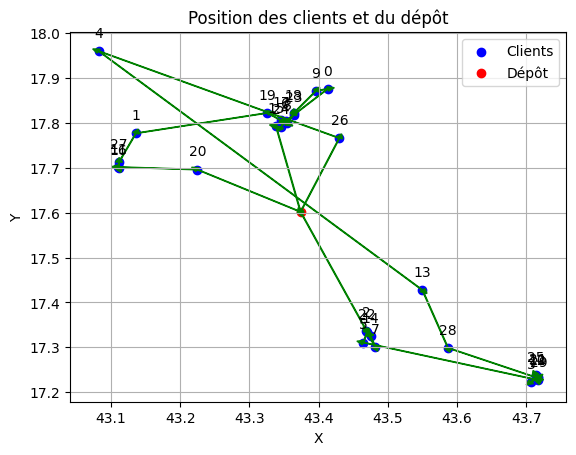

In [111]:
DEPOT = (depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])
# Tracer les positions des clients et du dépôt
plt.scatter(*zip(*client_positions), color='blue', label='Clients')
plt.scatter(*DEPOT, color='red', label='Dépôt')
for i, (x, y) in enumerate(client_positions):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i in range(n):
        current_location = DEPOT

        for client_position in bestRoute[i]:
                client_position = [client_position.x,client_position.y]
                plt.arrow(current_location[0], current_location[1], client_position[0] - current_location[0],
                        client_position[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')
                current_location = client_position
        plt.arrow(current_location[0], current_location[1], DEPOT[0] - current_location[0],
                DEPOT[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position des clients et du dépôt')
plt.grid(True)
plt.show()

In [112]:
from matplotlib import pyplot
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankIts(pop)[0][1]) #fitness du 1er de la liste
    
    for i in range(0, generations):
        print(f"Génération n{i+1}")
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankIts(pop)[0][1])
    
    pyplot.plot(progress)
    pyplot.ylabel('Distance')
    pyplot.xlabel('Generation')
    pyplot.show()

Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

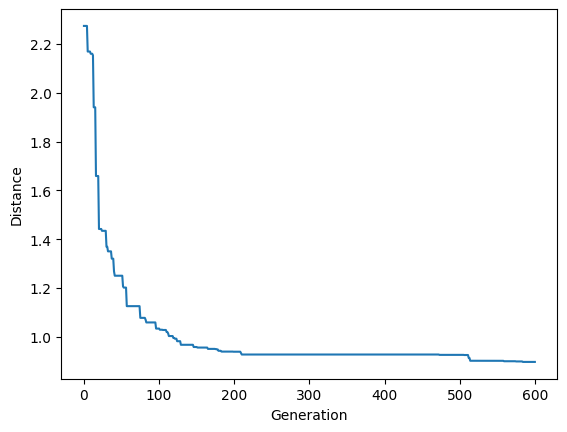

In [113]:
geneticAlgorithmPlot(population=pointsL, popSize=100, eliteSize=50, mutationRate=0.000005, generations=600)

In [114]:
print(client_positions)

[(43.41305, 17.87588), (43.135963, 17.776839), (43.46907801, 17.33702249), (43.70716, 17.2229), (43.08222786, 17.96003741), (43.46470189, 17.31043644), (43.35266, 17.80444), (43.48189308, 17.30045863), (43.35459, 17.79902), (43.396088, 17.871369), (43.71657, 17.23185), (43.11036, 17.70165), (43.71619, 17.2317), (43.54998018, 17.42732548), (43.475001, 17.325417), (43.33841, 17.79242), (43.111171, 17.69928539), (43.34568, 17.80545), (43.36378, 17.82157), (43.32605, 17.82229), (43.224819, 17.695885), (43.71695937, 17.23264032), (43.46991226, 17.3333838), (43.36369616, 17.8181746), (43.34521, 17.7901), (43.71342, 17.23878), (43.429906, 17.7661), (43.11155, 17.71267), (43.586910367012, 17.298542261123), (43.71763, 17.22673)]


In [148]:
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector


def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankIts(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = nouvelleGeneration(matingpool, eliteSize)
    nextGeneration = mutationPopulation(children, mutationRate)
    return nextGeneration
    
class OptGenAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.pop = initialPopulation(self.model.popSize, self.model.population)
        self.best=1 / rankIts(self.pop)[0][1]
        self.collaboratif=collaboratif
        self.bestroute = self.pop[rankIts(self.pop)[0][0]]
    '''
    si je suis collaboratif, j'entre en contact avec les autres
    je vérifie s'il y a mieux que moi, dans ce cas, je recupere le meilleur dans ma population
    '''
    def contact(self):
        min=self.best
        
        for a in self.model.schedule.agents:
            if a.best<min:
                min=a.best
                best_agent=a
                
        #si ce n'est pas moi qui détient la meilleure valeur, je la prend
        #plusieurs techniques : soit juste je remplace mon meillur, on je décale de manière à supprimer mon pire
        #je commence par une solution simple, je remplace juste mon meilleur gene
        #je trouve mon meilleur gene
        
        mon_meilleure_fitness=0
        for i in range(len(self.pop)):
            somme=0
            for j in range(len(self.pop[i])):
                somme+=Fitness(self.pop[i][j]).itFitness()
            if somme>mon_meilleure_fitness:
                mon_meilleure_fitness=somme
                mon_meilleur_gene=i
        
        if min!=self.best:
            if type(best_agent).__name__=="OptGenAgent":
                son_meilleure_fitness=0
                for i in range(len(best_agent.pop)):
                    somme=0
                    for j in range(len(best_agent.pop[i])):
                        somme+=Fitness(best_agent.pop[i][j]).itFitness()
                    if somme>son_meilleure_fitness:
                        son_meilleure_fitness=somme
                        son_meilleur_gene=i
                
                #j'échange mon meilleur avec l'autre meilleur
                self.pop[mon_meilleur_gene]=best_agent.pop[son_meilleur_gene]
                self.best=1 / rankIts(self.pop)[0][1]
            else:
                self.pop[mon_meilleur_gene]=best_agent.bestroute[:]

    #passser d'une génération à une autre
    def step(self):
        self.pop = nextGeneration(self.pop, self.model.eliteSize, self.model.mutationRate)
        self.best=1 / rankIts(self.pop)[0][1]
        self.bestroute = self.pop[rankIts(self.pop)[0][0]]
        if self.collaboratif==True:
            self.contact()

n_clients=30
def data_prep(n_clients):
    n_depot = n_clients+1
    #on importe les donnée sur les clients et le depot
    df=pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','2_detail_table_customers.xls'))
    df_depot=pd.read_excel(os.path.join(os.getcwd(),'data_PTV_Fil_rouge','4_detail_table_depots.xls'))
    #on extrait les informations qui nous intéressent
    Columns=["CUSTOMER_NUMBER","CUSTOMER_LATITUDE","CUSTOMER_LONGITUDE"]
    Data =( df[Columns]
           .rename(columns={"CUSTOMER_NUMBER":"number","CUSTOMER_LATITUDE":"x","CUSTOMER_LONGITUDE":"y"})
          )
    Data=Data.head(n_clients)
    depot = df_depot[['DEPOT_CODE','DEPOT_LATITUDE','DEPOT_LONGITUDE']].drop_duplicates()
    depot = depot.rename(columns={"DEPOT_CODE":"number of client/depot","DEPOT_LATITUDE":"x","DEPOT_LONGITUDE":"y"})
    Data.loc[len(Data)]=depot.iloc[0]
    return Data
def client_distances(Data):
    #définition d'une matrice U qui contient les distances entre les clienst/depot
    U=np.zeros((len(Data),len(Data)))
    for i in range(len(Data)):
        for j in range(i+1,len(Data)):
            U[i,j]=np.sqrt((Data.iloc[i,1]-Data.iloc[j,1])**2+(Data.iloc[i,2]-Data.iloc[j,2])**2)
            U[j,i]=U[i,j]
    return U
Data=data_prep(n_clients)
U=client_distances(Data)

def fonction_objectif( solution,M=U):
    somme=0
    for j in range(len(solution)):
        somme+=Fitness(solution[j]).itFitness()
            #fitnessResults[i].append((j, Fitness(population[i][j]).itFitness()))
    return somme

"""def initialiser_solution(nb_veh=2,n=n_clients):
    L=[[n] for _ in range(nb_veh)]
    aux=[i for i in range(1,n-1)]
    random.shuffle(aux)

    lower_bound = 15
    upper_bound = max(15, len(aux) - 15)
    S1 = random.sample(aux, random.randint(lower_bound, upper_bound))
    
    #S1=random.sample(aux,random.randint(15,len(aux)-15))
    aux=list(set(aux)-set(S1))
    L[0].extend(S1)
    L[0].append(n)
    L[1].extend(aux)
    L[1].append(n)
    for i in range(len(L)):
        for j in range(len(L[i])):
            L[i][j]=client_positions[L[i][j]]
    return L"""

def initialiser_solution(pointsList):
    return split_list(random.sample(pointsList, len(pointsList)),n)

def generer_voisins(solution,n_voisins=50):
    voisins = []
    n=len(solution)
    test=False
    m = len(solution[0])
    if len(solution[1])<len(solution[0]):
        m=len(solution[1])
        test=True
    voisins=[]    
    for i in range(1,m-2):
        for j in range(i+1,m-1):
            voisin0=solution[0][:]
            voisin1=solution[1][:]
            voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
            voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
            voisins.append([voisin0,voisin1])
    if test==False:
        for i in range(m-1,len(solution[1])-2):
            for j in range(i+1,len(solution[1])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin1[i],voisin1[j]=voisin1[j],voisin1[i]
                voisins.append([voisin0,voisin1])
    else:
        for i in range(m-1,len(solution[0])-2):
            for j in range(i+1,len(solution[0])-1):
                voisin0=solution[0][:]
                voisin1=solution[1][:]
                voisin0[i],voisin0[j]=voisin0[j],voisin0[i]
                voisins.append([voisin0,voisin1])
    for k in range(n_voisins):
        voisin0 = solution[0][:]
        voisin1=solution[1][:]
        l=random.sample(range(1,m-2),4)
        aux1,aux2,aux3,aux4=voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]
        voisin0[l[0]], voisin0[l[1]], voisin0[l[2]], voisin0[l[3]]= voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]
        voisin1[l[0]], voisin1[l[1]], voisin1[l[2]], voisin1[l[3]]= aux1,aux2,aux3,aux4
        voisins.append([voisin0,voisin1])
    return voisins

class OptTabuAgent(Agent):
    def __init__(self, unique_id, model, collaboratif=False):
        super().__init__(unique_id, model)        
        self.sol = initialiser_solution(pointsL)
        self.bestA=fonction_objectif(self.sol)
        self.collaboratif=collaboratif
        self.bestroute= self.sol[:]
        self.best_iter=0
        self.iter=0
        self.limit=40
        self.compt=100
        self.history=[self.bestA]
        self.T=[self.sol]
        self.taille_max_T=5
        self.best=1/self.bestA

    """def contact(self):
        max=self.best
        
        for a in self.model.schedule.agents:
            if a.best>max:
                max=a.best
                best_agent=a
                self.bestroute=a.sol
                self.bestA=min"""

    def contact(self):
        min=self.best
        
        for a in self.model.schedule.agents:
            if a.best<min:
                min=a.best
                best_agent=a
                
        #si ce n'est pas moi qui détient la meilleure valeur, je la prend
        #plusieurs techniques : soit juste je remplace mon meillur, on je décale de manière à supprimer mon pire
        #je commence par une solution simple, je remplace juste mon meilleur gene
        #je trouve mon meilleur gene
        
        if min!=self.best:
            if type(best_agent).__name__=="OptGenAgent":
                son_meilleure_fitness=0
                for i in range(len(best_agent.pop)):
                    somme=0
                    for j in range(len(best_agent.pop[i])):
                        somme+=Fitness(best_agent.pop[i][j]).itFitness()
                    if somme>son_meilleure_fitness:
                        son_meilleure_fitness=somme
                        son_meilleur_gene=i
                
                #j'échange mon meilleur avec l'autre meilleur
                self.bestroute=best_agent.pop[son_meilleur_gene]
                self.best=best_agent.best
            else:
                self.bestroute=a.bestroute
                self.best=min

    def step(self):
        self.iter+=1
        if(self.iter-self.best_iter>=100) :    
            if self.compt==100:
                #print('yes')
                self.solution=initialiser_solution(pointsL)
            self.compt-=1
        
        if self.compt ==0:
            self.compt =100
        voisins = generer_voisins(self.sol)       
        meilleure_voisin = max(voisins,key= lambda x:fonction_objectif(x))        
        while meilleure_voisin in self.T:
            voisins.remove(meilleure_voisin)
            meilleure_voisin = max(voisins,key= lambda x:fonction_objectif(x))
            
        # Mettre à jour la meilleure solution trouvée
        if (fonction_objectif(meilleure_voisin) > self.bestA) and (meilleure_voisin not in self.T):
            self.bestroute = meilleure_voisin[:]
            self.bestA=fonction_objectif(meilleure_voisin)
        
        self.T.append(meilleure_voisin) 
        if len(self.T) > self.taille_max_T:
            self.T.pop(0)  # Supprimer le plus ancien élément de T
        # Mettre à jour la fonction d'aspiration
        A = fonction_objectif(self.bestroute)
        # Mettre à jour la solution courante
        self.sol = meilleure_voisin[:]
        self.history.append(A)
        
        self.best= 1/self.bestA

        if self.collaboratif==True:
            self.contact()    
    

class OptimisationCollaborativeModel(Model):

    def __init__(self, population, N=6, popSize=100, eliteSize=50, mutationRate=0.00005):
        super().__init__()
        self.population = population
        self.num_agents = N
        self.popSize = popSize
        self.eliteSize = eliteSize
        self.mutationRate = mutationRate
        
        #The scheduler
        self.schedule = SimultaneousActivation(self)
        
        # Create agents
        for i in range(int(self.num_agents/2)):
            a = OptGenAgent(i, self, True)
            self.schedule.add(a)
            
        for i in range(int(self.num_agents/2),self.num_agents):
            a = OptTabuAgent(i, self, True)
            self.schedule.add(a)
        
        self.datacollector = DataCollector(
            #model_reporters={"TheGlobalBest": compute_global_best},
            agent_reporters={"Best Distance": lambda a:a.best, "Best route":lambda a:a.bestroute})


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

generations=300

cityList = pointsL

model = OptimisationCollaborativeModel(cityList)

for i in range(generations):
    print(f"Génération n{i+1}")
    model.step()  
    

agent_state = model.datacollector.get_agent_vars_dataframe()
print(agent_state)


Génération n1
Génération n2
Génération n3
Génération n4
Génération n5
Génération n6
Génération n7
Génération n8
Génération n9
Génération n10
Génération n11
Génération n12
Génération n13
Génération n14
Génération n15
Génération n16
Génération n17
Génération n18
Génération n19
Génération n20
Génération n21
Génération n22
Génération n23
Génération n24
Génération n25
Génération n26
Génération n27
Génération n28
Génération n29
Génération n30
Génération n31
Génération n32
Génération n33
Génération n34
Génération n35
Génération n36
Génération n37
Génération n38
Génération n39
Génération n40
Génération n41
Génération n42
Génération n43
Génération n44
Génération n45
Génération n46
Génération n47
Génération n48
Génération n49
Génération n50
Génération n51
Génération n52
Génération n53
Génération n54
Génération n55
Génération n56
Génération n57
Génération n58
Génération n59
Génération n60
Génération n61
Génération n62
Génération n63
Génération n64
Génération n65
Génération n66
Génération n67
Géné

        Best Distance                                                    \
AgentID             0         1         2         3         4         5   
Step                                                                      
0            2.364231  2.543774  2.285286  2.684090  3.465811  3.160435   
1            2.264343  2.264343  2.264343  2.264343  2.264343  2.264343   
2            2.213187  2.213187  2.109574  2.087206  2.087206  2.087206   
3            2.208742  2.136043  2.093916  1.952698  1.952698  1.952698   
4            2.087206  2.087206  2.087206  1.866292  1.866292  1.866292   
...               ...       ...       ...       ...       ...       ...   
295          0.848610  0.848610  0.848610  0.848610  0.848610  0.848610   
296          0.848610  0.848610  0.848610  0.848610  0.848610  0.848610   
297          0.848610  0.848610  0.848610  0.848610  0.848610  0.848610   
298          0.848610  0.848610  0.848610  0.848610  0.848610  0.848610   
299          0.848610  0.

<Axes: xlabel='Step'>

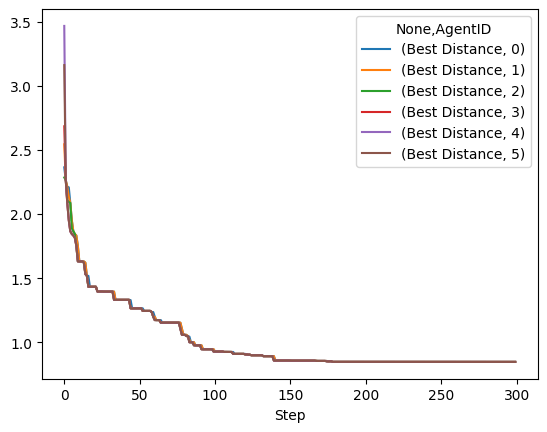

In [149]:
res=agent_state.unstack()
print(res)
res.plot()

In [150]:
res1=res['Best Distance']
res2=res['Best route']
print(res1.min().idxmin())
print(res1.idxmin()[res1.min().idxmin()])
print(res2[res1.min().idxmin()][res1.idxmin()[res1.min().idxmin()]])


0
230
[[(43.33841,17.79242), (43.34568,17.80545), (43.35459,17.79902), (43.35266,17.80444), (43.36378,17.82157), (43.36369616,17.8181746), (43.41305,17.87588), (43.396088,17.871369), (43.32605,17.82229), (43.08222786,17.96003741), (43.11155,17.71267), (43.11036,17.70165), (43.111171,17.69928539), (43.135963,17.776839), (43.224819,17.695885)], [(43.34521,17.7901), (43.46907801,17.33702249), (43.48189308,17.30045863), (43.46991226,17.3333838), (43.475001,17.325417), (43.46470189,17.31043644), (43.71619,17.2317), (43.71695937,17.23264032), (43.70716,17.2229), (43.71763,17.22673), (43.71657,17.23185), (43.71342,17.23878), (43.586910367012,17.298542261123), (43.54998018,17.42732548), (43.429906,17.7661)]]


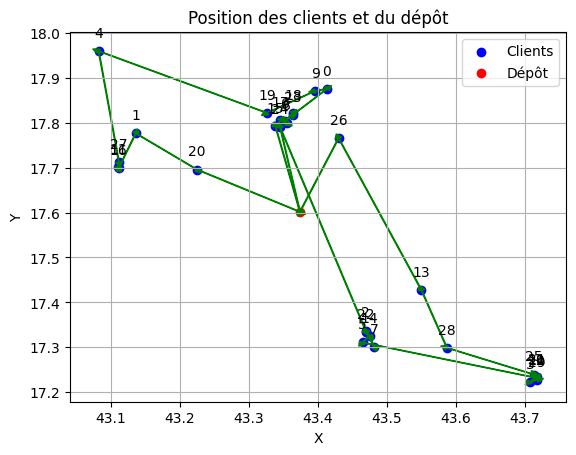

In [151]:
DEPOT = (depot_info.iloc[0]['x'], depot_info.iloc[0]['y'])
plt.scatter(*zip(*client_positions), color='blue', label='Clients')
plt.scatter(*DEPOT, color='red', label='Dépôt')
for i, (x, y) in enumerate(client_positions):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')


for i in range(n):
        current_location = DEPOT

        for client_position in res2[res1.min().idxmin()][res1.idxmin()[res1.min().idxmin()]][i]:
                client_position = [client_position.x,client_position.y]
                plt.arrow(current_location[0], current_location[1], client_position[0] - current_location[0],
                        client_position[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')
                current_location = client_position
        plt.arrow(current_location[0], current_location[1], DEPOT[0] - current_location[0],
                DEPOT[1] - current_location[1], head_width=0.01, head_length=0.01, fc='green', ec='green')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position des clients et du dépôt')
plt.grid(True)
plt.show()